In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pd.set_option('display.max_rows', None)
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Load the data
df = pd.read_csv('./Movie Data/movies.csv')

In [2]:
# Preview data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check missing data

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
len(df[df['budget'].isnull() | df['gross'].isnull()]) / len(df) * 100

29.107981220657276

In [5]:
df['budget'] = df['budget'].replace(np.nan, 0)
df['gross'] = df['gross'].replace(np.nan, 0)

In [6]:
# Check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Convert data type

float_columns = ['budget', 'gross']

for col in float_columns:
    df[col] = df[col].astype('int64')

In [8]:
# Data extraction

df['released_country'] = df['released'].apply(lambda x: np.nan if pd.isna(x) else x[x.find('(') + 1 : x.find(')')])
df['released_year'] = df['released'].str.extract(r'(\b\d{4}\b)')

In [9]:
# Drop duplicates

df = df.drop_duplicates()

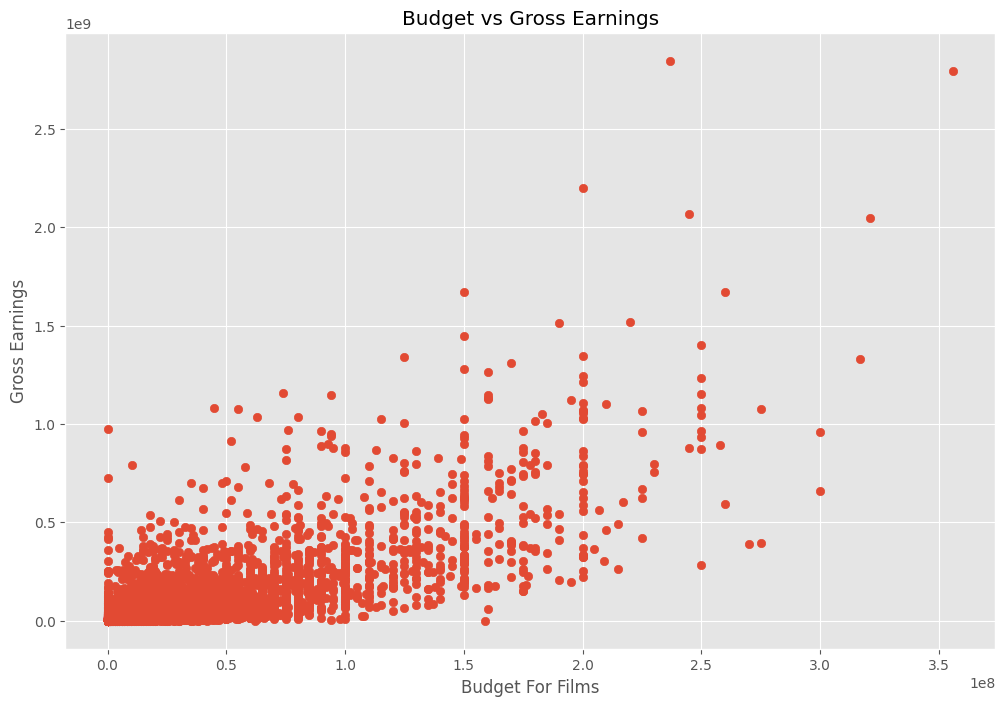

In [10]:
# Budget vs Gross (scatter plot)

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Films')
plt.ylabel('Gross Earnings')
plt.show()

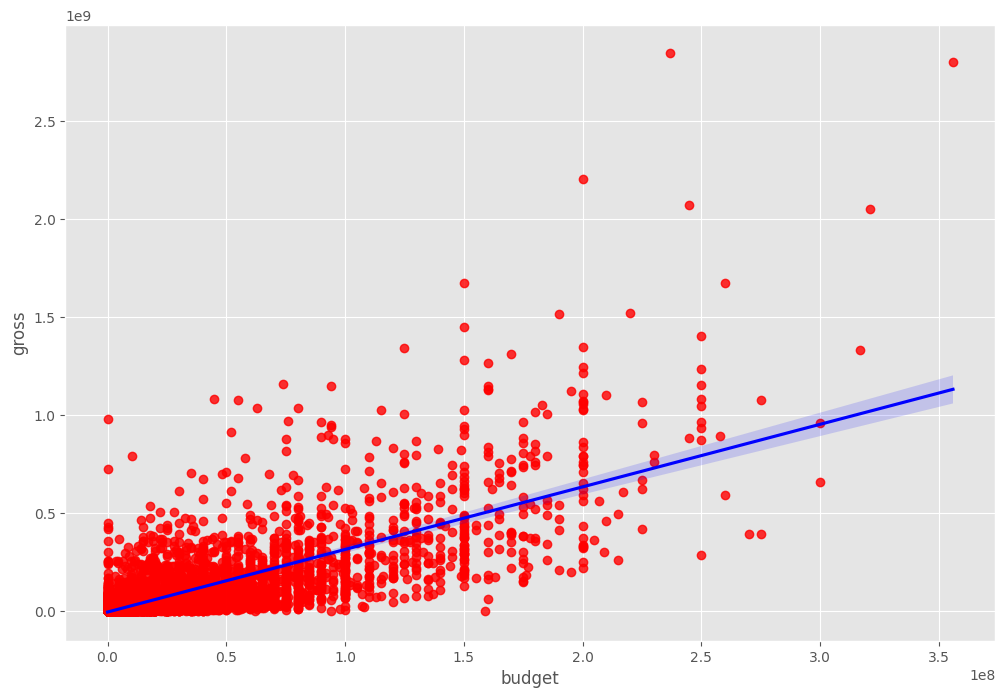

In [11]:
# Budget vs Gross (regretion scatter plot)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={ 'color': 'red' }, line_kws={ 'color': 'blue' })
plt.show()

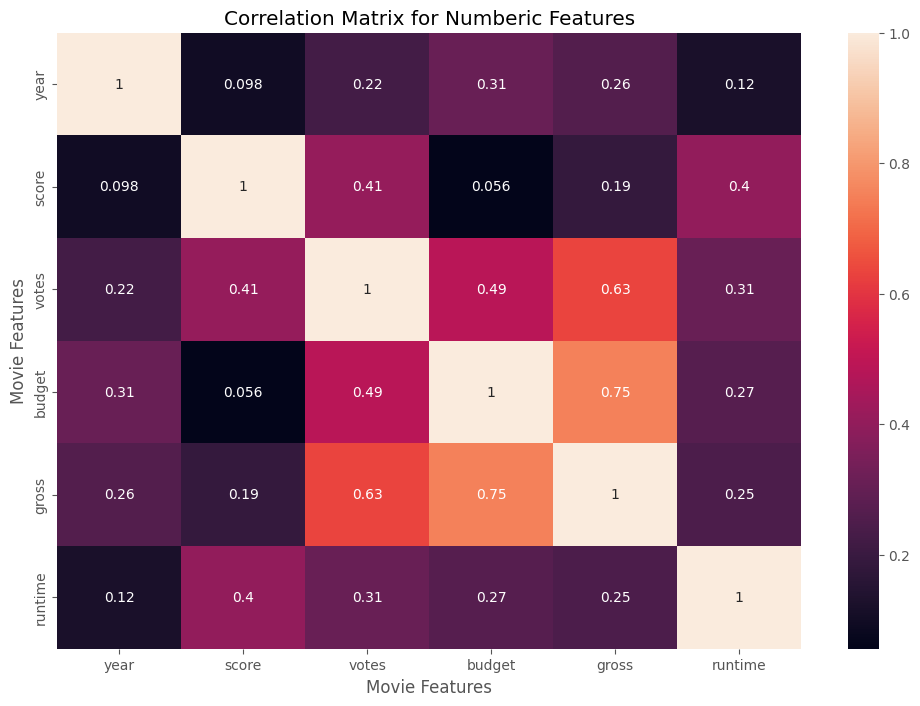

In [12]:
# Correlation Heatmap

correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numberic Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [13]:
# 

df_categorized = df

for col in df_categorized.columns:
    if df_categorized[col].dtype == 'object':
        df_categorized[col] = df_categorized[col].astype('category').cat.codes

In [14]:
df_categorized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_country,released_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,56,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,56,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,56,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,56,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,56,0


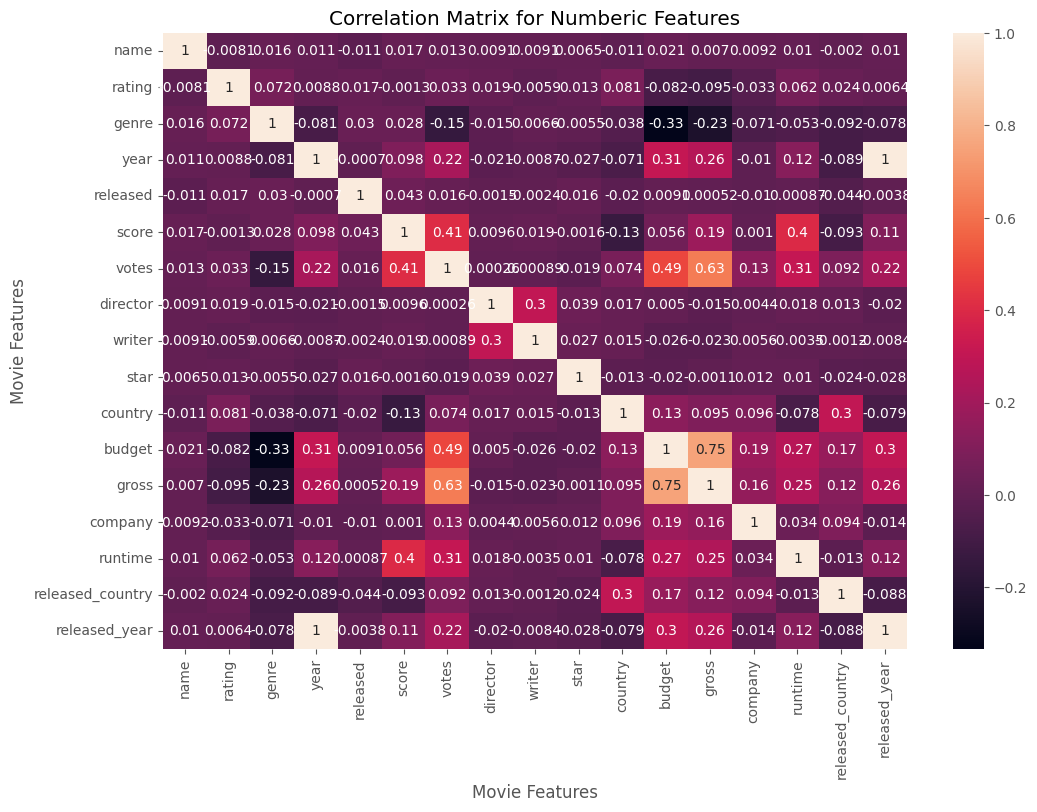

In [15]:
correlation_matrix = df_categorized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numberic Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

votes          gross            0.632834
gross          votes            0.632834
budget         gross            0.750157
gross          budget           0.750157
released_year  year             0.996397
year           released_year    0.996397
dtype: float64